# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Loading Dataset

In [8]:
conn = sqlite3.connect('jobs.db')

query = "SELECT * FROM jobs_cleaned_table WHERE (job_group = 'Data Scientist' OR job_group = 'Data Analyst' OR job_group = 'Data Engineer')"
df = pd.read_sql_query(query, conn)

df['date_posted'] = pd.to_datetime(df['date_posted'].str.split().str[0], errors='coerce').dt.strftime('%Y-%m-%d')

conn.close()

# Análisis exploratorio de Datos (EDA)

In [9]:
df.head()

,id,site,job_url,job_url_direct,title,company,date_posted,level,job_group,remote,...,country,city_state,max_salary,min_salary,mean_salary,skills,experience,education,programming_languages,languages
0,in-27b47cbb1665c29b,indeed,https://www.indeed.com/viewjob?jk=27b47cbb1665...,https://click.appcast.io/t/pOfXzqYmanNN_hrh4Ii...,Data Analyst-Technical-Senior,Intermountain Health,2026-02-14,Senior,Data Analyst,Remote,...,US,"Murray, UT",126960.0,79120.0,103040.0,"SQL, Bachelor",4,Bachelor,SQL,
1,in-3992632c60621073,indeed,https://www.indeed.com/viewjob?jk=3992632c6062...,https://www.disneycareers.com/job/-/-/391/9171...,Data Analyst,Disney Direct to Consumer,2026-02-14,Mid-Level,Data Analyst,On-site,...,US,"New York, NY",136900.0,97500.0,117200.0,"Airflow, Master, Artificial Intelligence, Jupy...",3,Master,"R, SQL, Python",
2,in-966d03962944ee35,indeed,https://www.indeed.com/viewjob?jk=966d03962944...,https://www.disneycareers.com/job/-/-/391/9170...,Associate Data Analyst,Disney Direct to Consumer,2026-02-14,Mid-Level,Data Analyst,On-site,...,US,"New York, NY",113300.0,80700.0,97000.0,"Airflow, Artificial Intelligence, Jupyter, Pow...",0,Bachelor,"R, SQL, Python",
3,in-242800a4c5ad4ab9,indeed,https://www.indeed.com/viewjob?jk=242800a4c5ad...,https://careers.cshs.org/job/-/-/252/91709666576,Senior HR Data/Report Systems Analyst (Oracle ...,Cedars-Sinai Medical Center,2026-02-14,Senior,Data Analyst,Remote,...,US,"Los Angeles, CA",149697.0,93558.0,121627.5,"Excel, Oracle, Master, Bachelor, Tableau, SQL",0,Master,SQL,
4,in-3d2ffbc39988f748,indeed,https://www.indeed.com/viewjob?jk=3d2ffbc39988...,https://careers.nyp.org/job/-/-/19715/91690809...,Senior Medical Data Analyst,NewYork-Presbyterian Hospital,2026-02-14,Senior,Data Analyst,On-site,...,US,"Manhattan, NY",114080.0,99360.0,106720.0,,4,None,,


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     855 non-null    object 
 1   site                   855 non-null    object 
 2   job_url                855 non-null    object 
 3   job_url_direct         855 non-null    object 
 4   title                  855 non-null    object 
 5   company                837 non-null    object 
 6   date_posted            855 non-null    object 
 7   level                  855 non-null    object 
 8   job_group              855 non-null    object 
 9   remote                 855 non-null    object 
 10  city                   777 non-null    object 
 11  state                  802 non-null    object 
 12  country                838 non-null    object 
 13  city_state             777 non-null    object 
 14  max_salary             631 non-null    float64
 15  min_sa

In [11]:
df.describe(include='all')

,id,site,job_url,job_url_direct,title,company,date_posted,level,job_group,remote,...,country,city_state,max_salary,min_salary,mean_salary,skills,experience,education,programming_languages,languages
count,855,855,855,855,855,837,855,855,855,855,...,838,777,631.000000,631.000000,631.000000,855,855.000000,668,855,855
unique,855,1,855,658,481,369,67,4,3,3,...,1,247,NaN,NaN,NaN,467,NaN,4,68,6
top,in-27b47cbb1665c29b,indeed,https://www.indeed.com/viewjob?jk=27b47cbb1665...,https://deloitteus.avature.net/careers/InviteT...,"GFS Lead Analyst, Vendor Master Data Management",Amazon.com,2026-02-13,Mid-Level,Data Scientist,On-site,...,US,"New York, NY",NaN,NaN,NaN,"C++, PhD, Master, Artificial Intelligence, Ten...",NaN,PhD,,
freq,1,855,1,31,31,195,308,419,432,578,...,838,76,NaN,NaN,NaN,48,NaN,239,129,826
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,195256.210777,127221.865293,161239.038035,NaN,3.916959,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68084.271430,44082.098954,54333.232930,NaN,3.010346,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,33120.000000,27600.000000,30360.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,140600.000000,88350.000000,115000.000000,NaN,2.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,203940.000000,136000.000000,168000.000000,NaN,3.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,255400.000000,156177.000000,205200.000000,NaN,5.000000,NaN,NaN,NaN


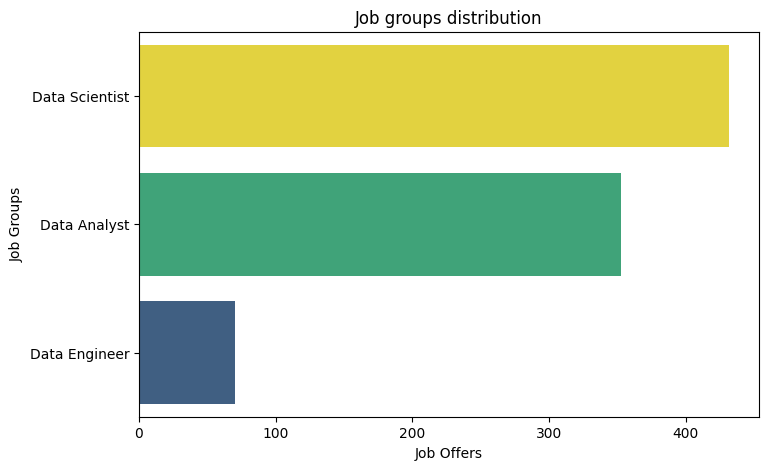

In [12]:
job_groups_counts = df['job_group'].value_counts()

def plot_bars(x, y, figsize=(8,5), title=None, xlabel=(None), ylabel=(None), palette=None):
    plt.figure(figsize=figsize)
    cmap = plt.cm.get_cmap(palette).reversed()
    palette = [cmap(x) for x in np.linspace(0,0.7,len(job_groups_counts))]
    
    sns.barplot(x=x,y=y,palette=palette)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
plot_bars(x=job_groups_counts.values, y=job_groups_counts.index,title='Job groups distribution', xlabel='Job Offers', ylabel='Job Groups', palette='viridis')